In [1]:
import sys

sys.path.append("..")

In [2]:
from experiments.draw import plot_results
from experiments.colors import get_vibrant_colors
from experiments.utils import load_experiment
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 600

In [48]:
NAME = "2_ring_excentric_ringnoise_20_noise_50_experiment_2"
SUBFOLDER = "general"
model, data, _ = load_experiment(NAME, SUBFOLDER)
plt.rcParams["figure.dpi"] = 600
plt.rcParams["figure.figsize"] = (8, 8)


INFO:nrc.fuzzycmeans:[FuzzyCMeans] Converged after 4 iterations. Stopping early.
INFO:nrc:[NoisyRingsClustering] Converged partly after 14 iterations. Recomputing noise mask and continuing. Total noise samples are 34.0
INFO:nrc:[NoisyRingsClustering] Converged partly after 15 iterations. Recomputing noise mask and continuing. Total noise samples are 33.0
INFO:nrc:Total noise samples: 33


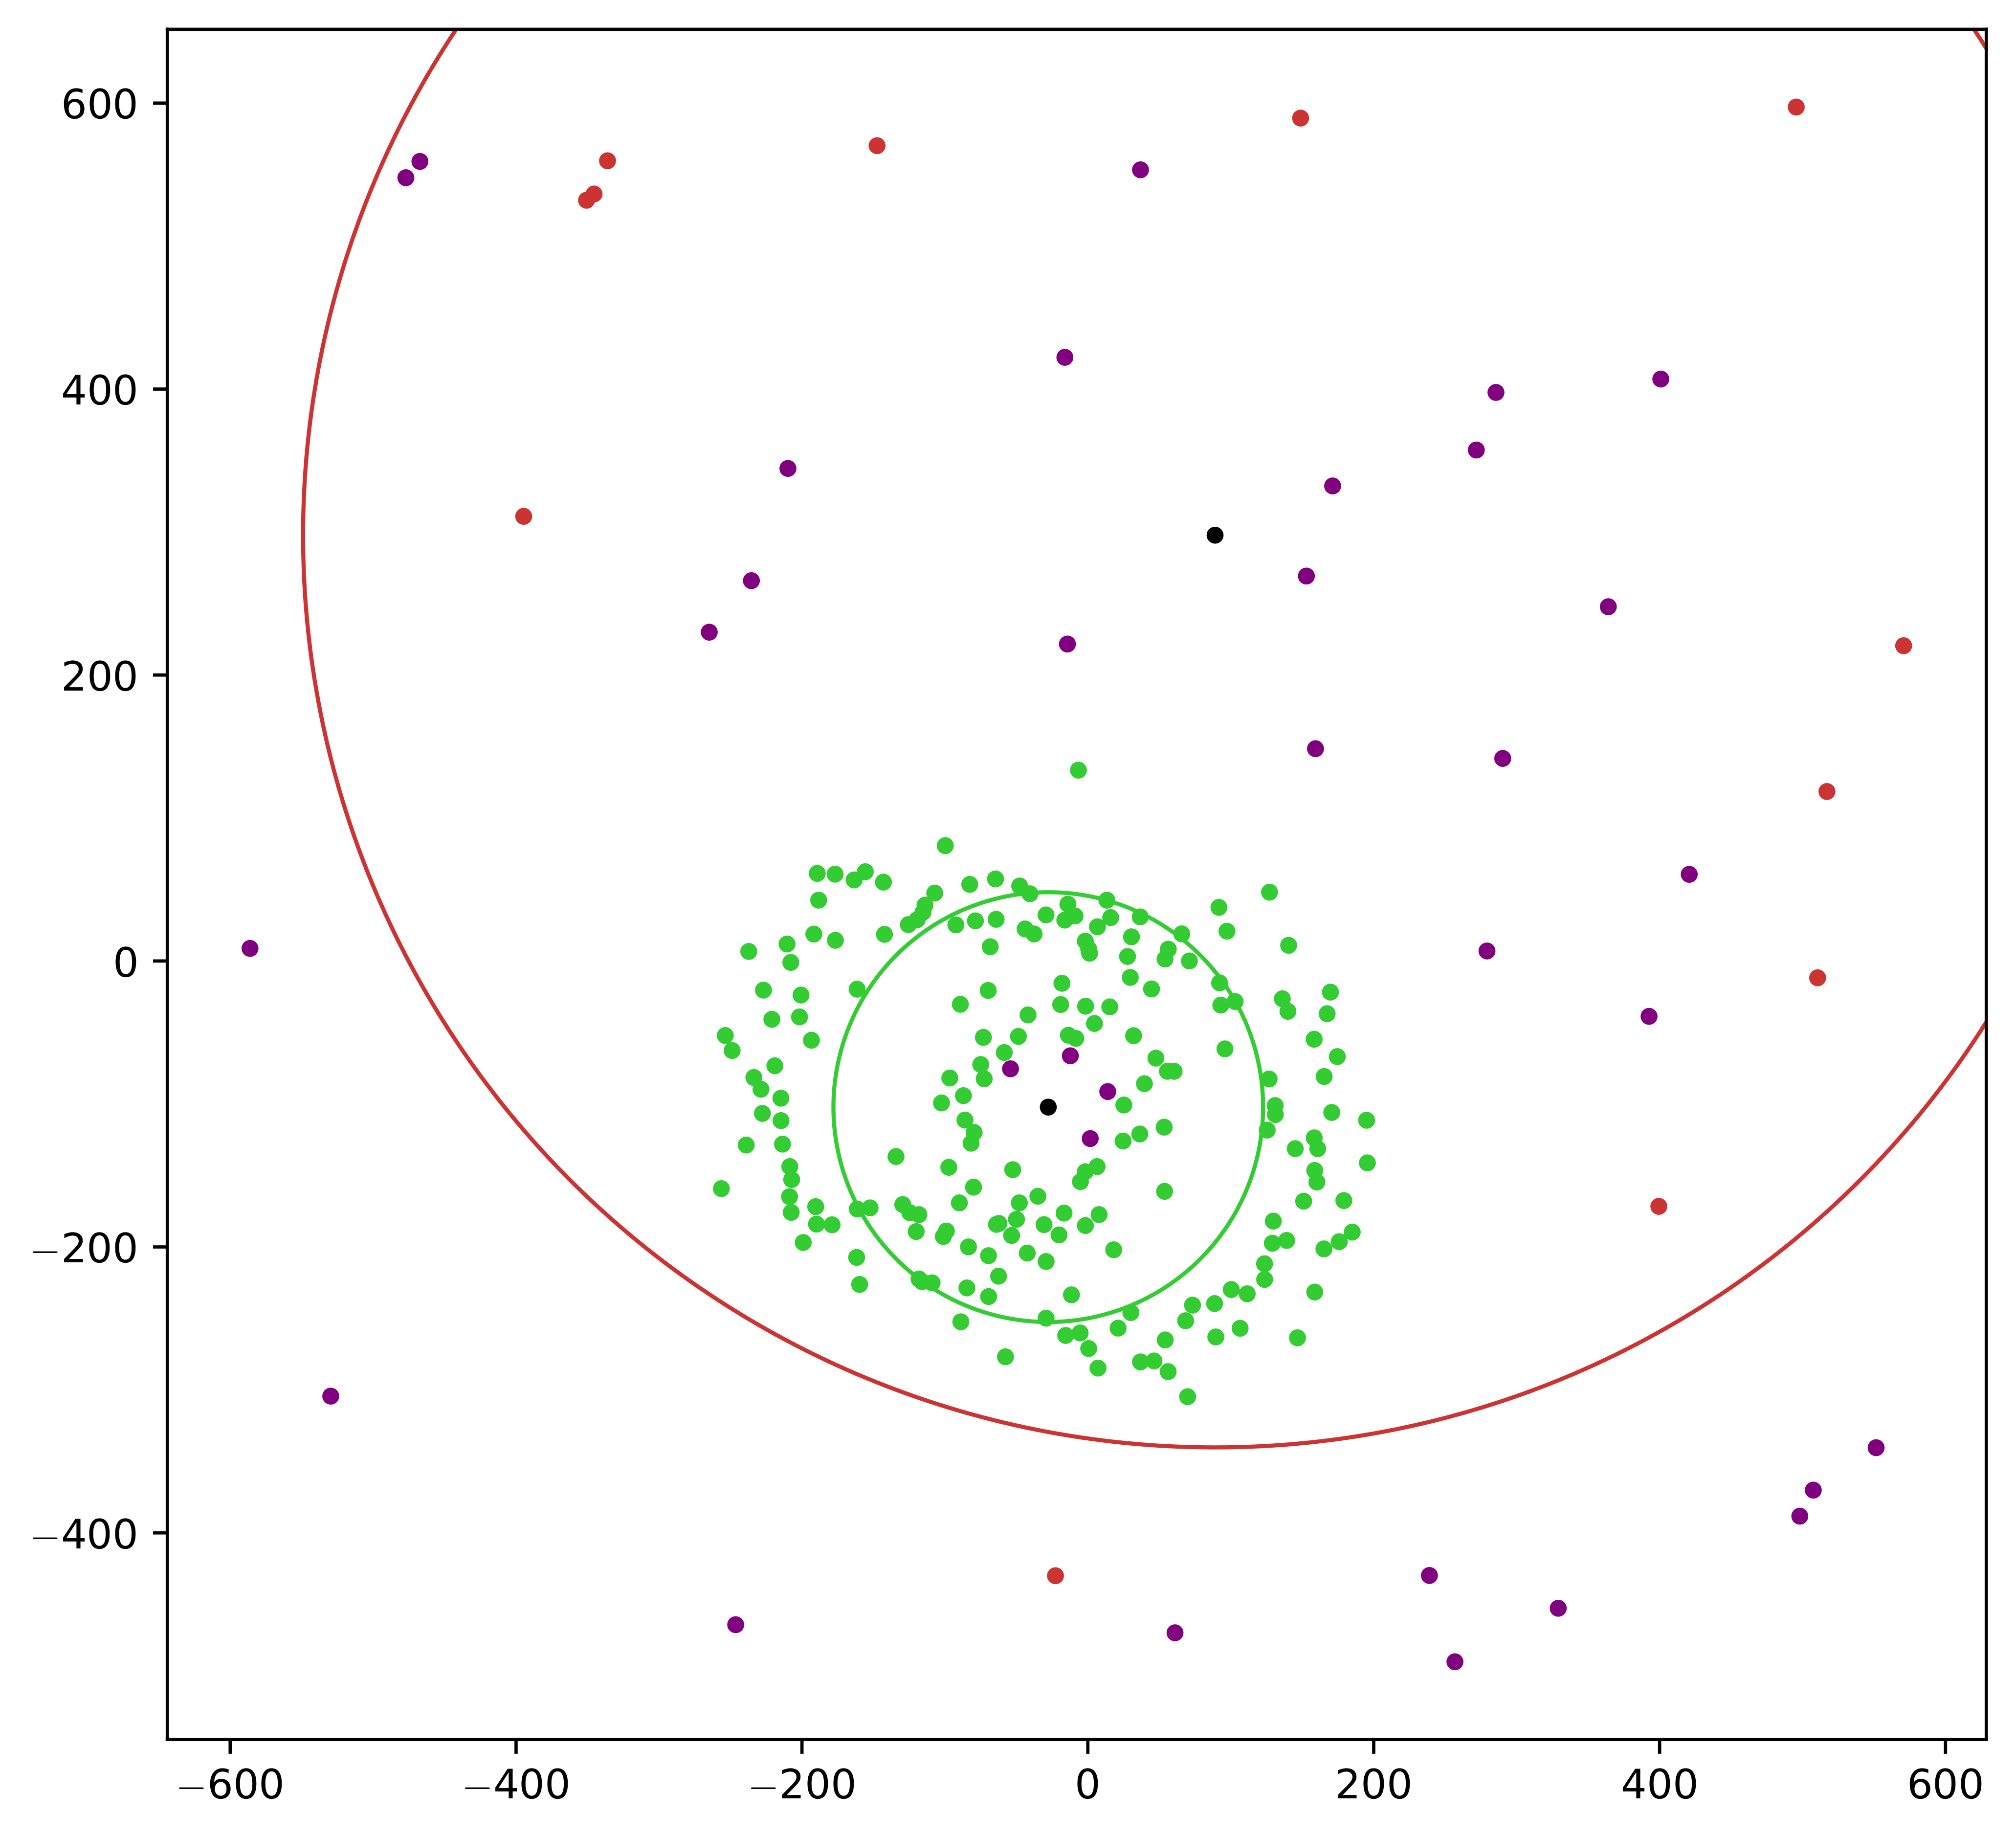

In [49]:
model.fit(data)

# Get the clustering results
# Get the clustering results
radii, centers, memberships = model.get_labels()
n_rings = model.n_rings
# Define distinct vibrant colors for each ring
vibrant_colors = get_vibrant_colors(n_rings)
# Ensure we have as many vibrant colors as we have rings
if len(vibrant_colors) < n_rings:
    raise ValueError("Not enough distinct vibrant colors for the number of rings")
fig = plot_results(data, radii, centers, memberships, vibrant_colors, show_noise=True)
fig

In [26]:
import matplotlib


def save_plot_to_tikz(name):
    old_backend = matplotlib.get_backend()
    matplotlib.use("pgf")
    fig.savefig(f"{name}.pgf")
    matplotlib.use(old_backend)


save_plot_to_tikz(NAME)
